# Dependencies

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Data Loading

In [10]:
def txt_to_pd(file_path):
    """
    Load data from a .txt file and convert into a pandas DataFrame
    Args: 
        file_path (string): Path location of the file to be converted
    Returns:
        df (DataFrame): converted dataframe with index set to "Unit Number"
    """
    
    delimiter = " "

    df = pd.read_csv(file_path, 
               delimiter=delimiter, 
               header=None,
               encoding='utf-8')
    df = df.dropna(axis=1)
    df.columns = ["Unit Number", "Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", "Sensor Measurement 1",
              "Sensor Measurement 2", "Sensor Measurement 3", "Sensor Measurement 4", "Sensor Measurement 5", "Sensor Measurement 6", "Sensor Measurement 7", 
              "Sensor Measurement 8", "Sensor Measurement 9", "Sensor Measurement 10", "Sensor Measurement 11", "Sensor Measurement 12", "Sensor Measurement 13", 
              "Sensor Measurement 14", "Sensor Measurement 15", "Sensor Measurement 16", "Sensor Measurement 17", "Sensor Measurement 18", "Sensor Measurement 19", 
              "Sensor Measurement 20", "Sensor Measurement 21"]
    df = df.set_index("Unit Number")
    return df

In [11]:
# Load training and test data
train = txt_to_pd("data/Challenge_Data/train.txt")
test = txt_to_pd("data/Challenge_Data/test.txt")

In [12]:
train.head()

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Unit Number                                                                  
1                          1                10.0047                 0.2501   
1                          2                 0.0015                 0.0003   
1                          3                34.9986                 0.8401   
1                          4                20.0031                 0.7005   
1                          5                42.0041                 0.8405   

             Operational Setting 3  Sensor Measurement 1  \
Unit Number                                                
1                             20.0                489.05   
1                            100.0                518.67   
1                             60.0                449.44   
1                              0.0                491.19   
1                             40.0                445.00   

             Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
1                          604.13               1499.45               1309.95   
1                          642.13               1584.55               1403.96   
1                          555.42               1368.17               1122.49   
1                          607.03               1488.44               1249.18   
1                          549.52               1354.48               1124.32   

             Sensor Measurement 5  Sensor Measurement 6  ...  \
Unit Number                                              ...   
1                           10.52                 15.49  ...   
1                           14.62                 21.61  ...   
1                            5.48                  8.00  ...   
1                            9.35                 13.65  ...   
1                            3.91                  5.71  ...   

             Sensor Measurement 12  Sensor Measurement 13  \
Unit Number                                                 
1                           372.15                2388.13   
1                           521.81                2388.15   
1                           183.26                2387.95   
1                           314.84                2388.07   
1                           130.44                2387.89   

             Sensor Measurement 14  Sensor Measurement 15  \
Unit Number                                                 
1                          8120.83                 8.6216   
1                          8132.87                 8.3907   
1                          8063.84                 9.3557   
1                          8052.30                 9.2231   
1                          8083.67                 9.2986   

             Sensor Measurement 16  Sensor Measurement 17  \
Unit Number                                                 
1                             0.03                    368   
1                             0.03                    391   
1                             0.02                    334   
1                             0.02                    364   
1                             0.02                    330   

             Sensor Measurement 18  Sensor Measurement 19  \
Unit Number                                                 
1                             2319                  100.0   
1                             2388                  100.0   
1                             2223                  100.0   
1                             2324                  100.0   
1                             2212                  100.0   

             Sensor Measurement 20  Sensor Measurement 21  
Unit Number                                                
1                            28.58                17.1735  
1                            38.99                23.3619  
1                            14.83                 8.8555  
1               

In [13]:
test.head()

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Unit Number                                                                  
1                          1                 0.0016                 0.0002   
1                          2                24.9993                 0.6215   
1                          3                 0.0004                 0.0000   
1                          4                10.0034                 0.2500   
1                          5                 0.0024                 0.0011   

             Operational Setting 3  Sensor Measurement 1  \
Unit Number                                                
1                            100.0                518.67   
1                             80.0                462.54   
1                            100.0                518.67   
1                             20.0                489.05   
1                            100.0                518.67   

             Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
1                          642.88               1587.21               1412.44   
1                          536.45               1262.64               1055.44   
1                          642.65               1589.75               1409.54   
1                          604.44               1499.93               1315.34   
1                          642.74               1585.47               1408.12   

             Sensor Measurement 5  Sensor Measurement 6  ...  \
Unit Number                                              ...   
1                           14.62                 21.61  ...   
1                            7.05                  9.02  ...   
1                           14.62                 21.61  ...   
1                           10.52                 15.49  ...   
1                           14.62                 21.61  ...   

             Sensor Measurement 12  Sensor Measurement 13  \
Unit Number                                                 
1                           521.44                2388.10   
1                           164.32                2027.95   
1                           521.15                2388.19   
1                           371.42                2388.21   
1                           520.86                2388.13   

             Sensor Measurement 14  Sensor Measurement 15  \
Unit Number                                                 
1                          8124.04                 8.4363   
1                          7865.20                10.8935   
1                          8121.12                 8.4620   
1                          8123.53                 8.6815   
1                          8118.30                 8.4617   

             Sensor Measurement 16  Sensor Measurement 17  \
Unit Number                                                 
1                             0.03                    393   
1                             0.02                    308   
1                             0.03                    393   
1                             0.03                    369   
1                             0.03                    392   

             Sensor Measurement 18  Sensor Measurement 19  \
Unit Number                                                 
1                             2388                 100.00   
1                             1915                  84.93   
1                             2388                 100.00   
1                             2319                 100.00   
1                             2388                 100.00   

             Sensor Measurement 20  Sensor Measurement 21  
Unit Number                                                
1                            38.97                23.3029  
1                            14.29                 8.6686  
1                            38.91                23.2693  
1               

# Data Preparation

In [14]:
# Convert training and test dataset into x and y
x_train = train.drop(["Time, in cycles"], axis=1)
y_train = train["Time, in cycles"]

x_test = test.drop(["Time, in cycles"], axis=1)
y_test = test["Time, in cycles"]

array([[<Axes: title={'center': 'Operational Setting 1'}>,
        <Axes: title={'center': 'Operational Setting 2'}>,
        <Axes: title={'center': 'Operational Setting 3'}>,
        <Axes: title={'center': 'Sensor Measurement 1'}>,
        <Axes: title={'center': 'Sensor Measurement 2'}>],
       [<Axes: title={'center': 'Sensor Measurement 3'}>,
        <Axes: title={'center': 'Sensor Measurement 4'}>,
        <Axes: title={'center': 'Sensor Measurement 5'}>,
        <Axes: title={'center': 'Sensor Measurement 6'}>,
        <Axes: title={'center': 'Sensor Measurement 7'}>],
       [<Axes: title={'center': 'Sensor Measurement 8'}>,
        <Axes: title={'center': 'Sensor Measurement 9'}>,
        <Axes: title={'center': 'Sensor Measurement 10'}>,
        <Axes: title={'center': 'Sensor Measurement 11'}>,
        <Axes: title={'center': 'Sensor Measurement 12'}>],
       [<Axes: title={'center': 'Sensor Measurement 13'}>,
        <Axes: title={'center': 'Sensor Measurement 14'}>,
   

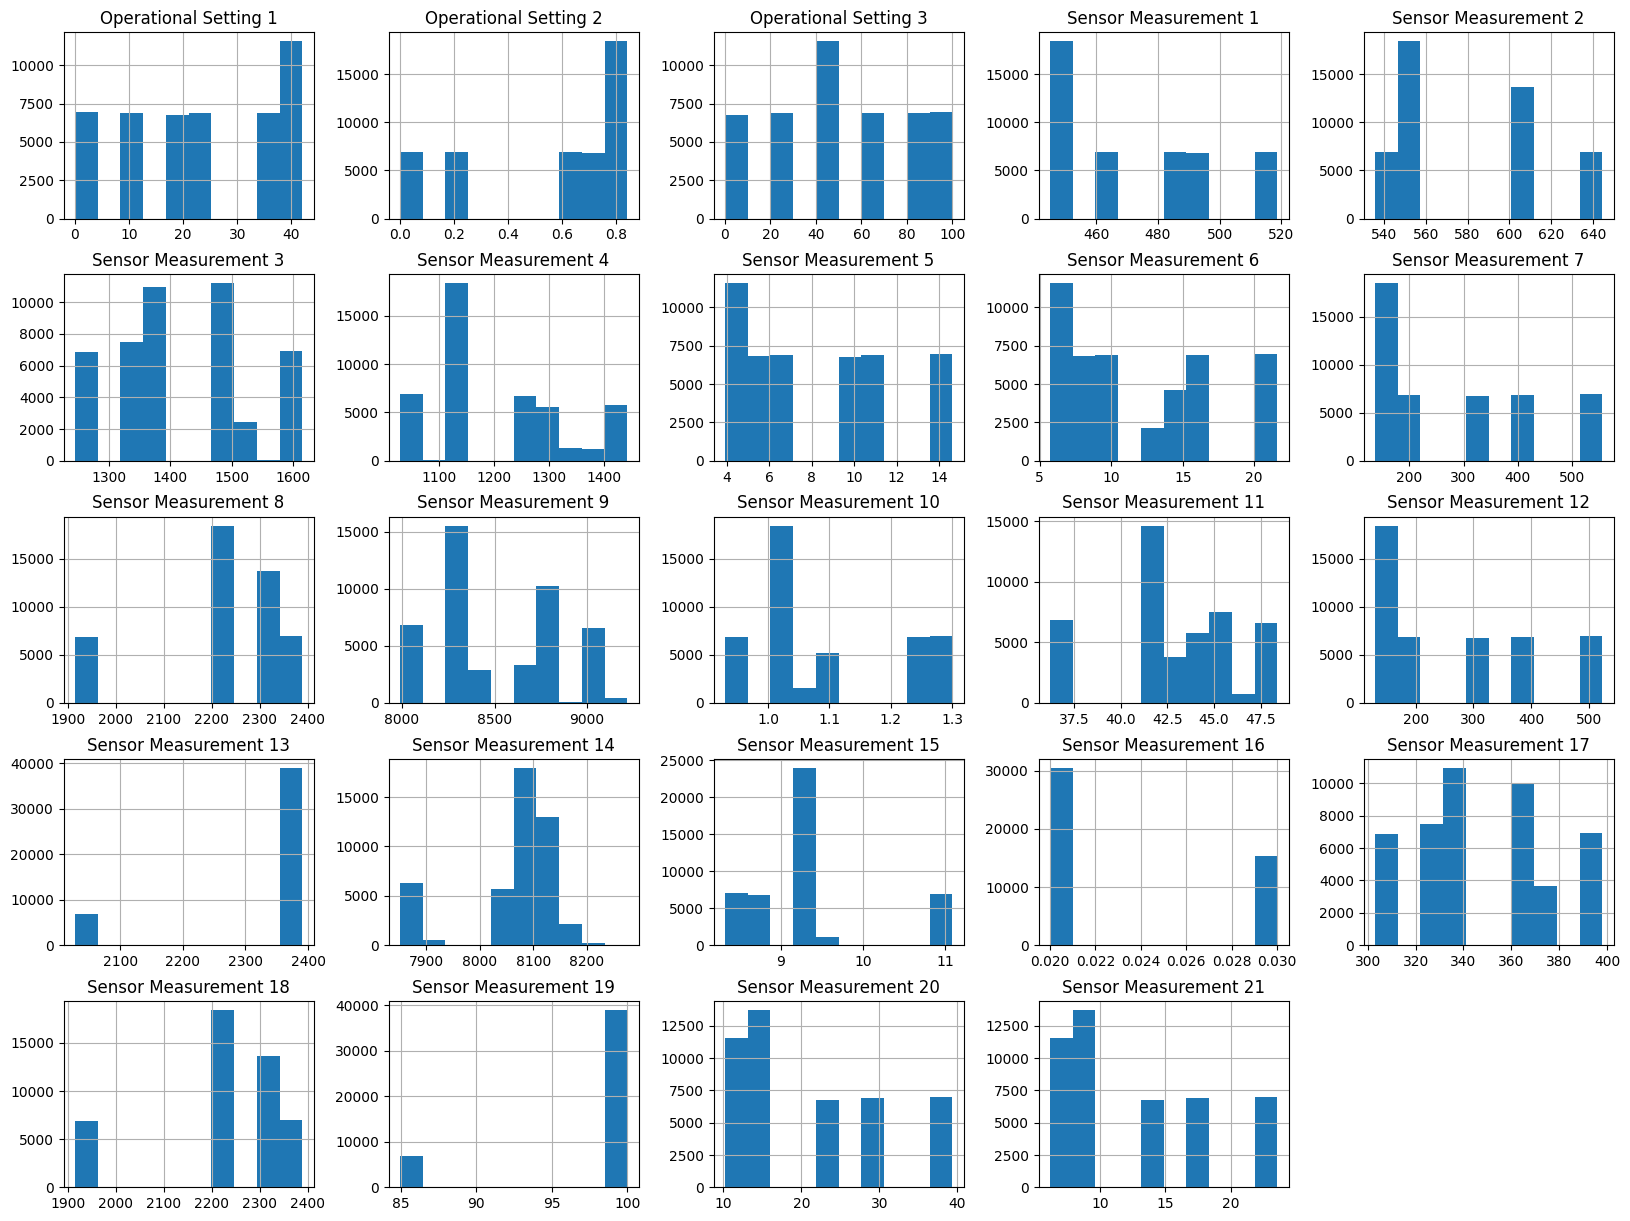

In [15]:
x_train.hist(bins=10, figsize=(20,15))

In [16]:
#Split data set into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x_train, y_train, test_size=0.2)

In [17]:
#Apply Feature scaling to transform the scaling of different features into similar scales.
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# 3D plotting

In [21]:
x_train.columns

Index(['Operational Setting 1', 'Operational Setting 2',
       'Operational Setting 3', 'Sensor Measurement 1', 'Sensor Measurement 2',
       'Sensor Measurement 3', 'Sensor Measurement 4', 'Sensor Measurement 5',
       'Sensor Measurement 6', 'Sensor Measurement 7', 'Sensor Measurement 8',
       'Sensor Measurement 9', 'Sensor Measurement 10',
       'Sensor Measurement 11', 'Sensor Measurement 12',
       'Sensor Measurement 13', 'Sensor Measurement 14',
       'Sensor Measurement 15', 'Sensor Measurement 16',
       'Sensor Measurement 17', 'Sensor Measurement 18',
       'Sensor Measurement 19', 'Sensor Measurement 20',
       'Sensor Measurement 21'],
      dtype='object')

In [25]:
op_data = x_train[['Operational Setting 1', 'Operational Setting 2', 'Operational Setting 3']]
x = op_data[op_data.columns[0]]
y = op_data[op_data.columns[1]]
z = op_data[op_data.columns[2]]

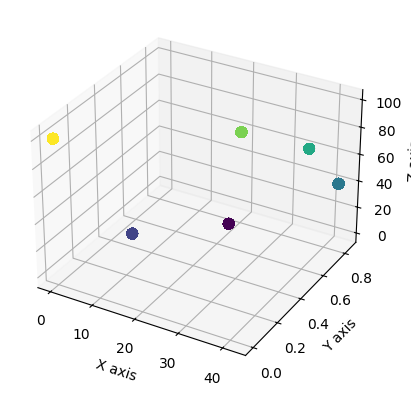

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create 3D scatter plot
ax.scatter(x, y, z, c=z, cmap='viridis', s=50)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# Get Operating Clusters using unsupervised learning

In [36]:
from sklearn.metrics import silhouette_score

# Calculate for silhoutte score
# Higher silhouette score = better clustering
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(op_data)
    score = silhouette_score(op_data, labels)
    print("cluster " + str(k) + " - " + str(score))
    scores.append(score)
    



score 2 - 0.5777667217847624
score 3 - 0.6646589484162314
score 4 - 0.7882728525424852
score 5 - 0.9194220366343638
score 6 - 0.9998558910028272
score 7 - 0.9363615604357539
score 8 - 0.8717377468079507
score 9 - 0.7624427897550593


[0.5777667217847624,
 0.6646589484162314,
 0.7882728525424852,
 0.9194220366343638,
 0.9998558910028272,
 0.9363615604357539,
 0.8717377468079507,
 0.7624427897550593]

[[1.51675295e-03 4.97670406e-04 1.00000000e+02]
 [3.50030533e+01 8.40489284e-01 6.00000000e+01]
 [1.00029627e+01 2.50502528e-01 2.00000000e+01]
 [4.20030440e+01 8.40510423e-01 4.00000000e+01]
 [2.50030126e+01 6.20516407e-01 8.00000000e+01]
 [2.00029465e+01 7.00497164e-01 8.73967565e-13]]


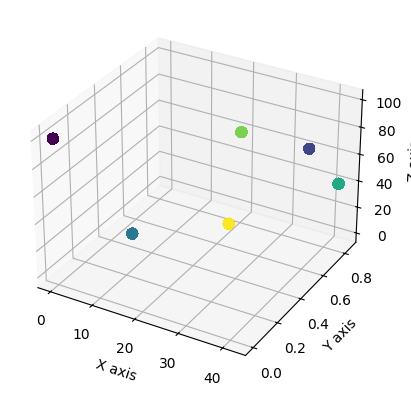

In [37]:
# Create and fit K-Means model using the optimal cluster number (k=6)
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(op_data)

# Get cluster centers
centers = kmeans.cluster_centers_
print(centers)

# Plot k-clusters 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create 3D scatter plot
ax.scatter(x, y, z, c=labels, cmap='viridis', s=50)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [61]:
train['cluster'] = labels

In [138]:
# Get Actual Remaining Life

unique_list = train.index.unique().tolist()
len(unique_list)
for i in range(len(unique_list)):
    train.loc[i+1, 'Cycle Max'] = train.loc[i+1]['Time, in cycles'].max()
train['Remaining Life'] = train['Time, in cycles'] - train['Cycle Max']

In [175]:
# Apply Standard Scaler by cluster

unique_clusters = train['cluster'].unique().tolist()

cluster_mean= pd.DataFrame()
cluster_std= pd.DataFrame()

for i in range(len(unique_clusters)):
    cluster_mean['Cluster ' + str(i+1)] = train[train['cluster'] == i].mean()
    cluster_std['Cluster ' + str(i+1)] = train[train['cluster'] == i].std()

cluster_mean = cluster_mean.transpose()
cluster_std = cluster_std.transpose()


In [210]:
# Get normalised sensor measurement

train_scaled_temp= pd.DataFrame()
train_scaled= pd.DataFrame()

for i in range(len(unique_clusters)):
    train_scaled_temp = (train[train['cluster'] == i] - cluster_mean.loc['Cluster ' + str(i+1)]) / cluster_std.loc['Cluster ' + str(i+1)]
    train_scaled_temp['Remaining Life Reference'] = train[train['cluster'] == i]['Remaining Life']
    train_scaled = pd.concat([train_scaled, train_scaled_temp], axis=0)
train_scaled = train_scaled.drop(["Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", 
                                  "cluster", "Cycle Max", "Remaining Life"], axis=1)
train_scaled = train_scaled.fillna(0)
train_scaled

Sensor Measurement 1  Sensor Measurement 2  Sensor Measurement 3  \
Unit Number                                                                     
1                        0.000000             -1.201429             -1.040821   
1                        0.000000             -1.304856             -0.192467   
1                        0.000000             -0.022372             -0.764258   
1                        0.000000             -0.849781             -1.037428   
1                        0.000000             -0.829095             -1.587161   
...                           ...                   ...                   ...   
218                      0.999926              0.068722             -0.602716   
218                      0.999926              0.645319             -0.440861   
218                      0.999926              0.004655              0.904455   
218                      0.999926              1.115138              0.667763   
218                      0.999926              1.264626              1.247310   

             Sensor Measurement 4  Sensor Measurement 5  Sensor Measurement 6  \
Unit Number                                                                     
1                       -0.626306             -0.999928              0.117050   
1                       -0.210731             -0.999928              0.117050   
1                       -1.193000             -0.999928              0.117050   
1                        0.077767             -0.999928              0.117050   
1                       -1.143772             -0.999928              0.117050   
...                           ...                   ...                   ...   
218                      1.304647              0.999926              0.674632   
218                      0.539303              0.999926              0.674632   
218                      0.808519              0.999926              0.674632   
218                     -0.158096              0.999926              0.674632   
218                      1.290545              0.999926              0.674632   

             Sensor Measurement 7  Sensor Measurement 8  Sensor Measurement 9  \
Unit Number                                                                     
1                        0.423932             -1.379841             -0.837832   
1                        0.201810             -0.059956             -0.604361   
1                        0.692816             -0.059956             -0.553496   
1                        0.809722             -0.646572             -0.286963   
1                        0.119976             -0.206610             -0.643528   
...                           ...                   ...                   ...   
218                     -0.758713             -0.558506             -1.219237   
218                     -0.225223             -0.325345             -1.233290   
218                     -0.842071             -0.636227             -0.757156   
218                     -0.608669             -0.092183             -0.545228   
218                     -0.541982             -0.014463             -0.711060   

             Sensor Measurement 10  ...  Sensor Measurement 13  \
Unit Number                         ...                          
1                        -0.999928  ...               0.652737   
1                        -0.999928  ...              -1.091965   
1                        -0.999928  ...              -0.365006   
1                        -0.999928  ...              -0.074222   
1                        -0.999928  ...              -0.655789   
...                            ...  ...                    ...   
218                      -1.800556  ...              -0.499119   
218                       0.555302  ...              -0.499119   
218                      -1.800556  ...              -0.422913   
218                      -1.800556  ...               0.034327   
218                       0.555302  ...              -0.499

KeyError: "['Time, in cycles', 'Operational Setting 1', 'Operational Setting 2', 'Operational Setting 3', 'cluster', 'Cycle Max', 'Remaining Life', 'Remaining Life Reference'] not found in axis"

In [201]:
train.head(8)

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Unit Number                                                                  
1                          1                10.0047                 0.2501   
1                          2                 0.0015                 0.0003   
1                          3                34.9986                 0.8401   
1                          4                20.0031                 0.7005   
1                          5                42.0041                 0.8405   
1                          6                20.0032                 0.7017   
1                          7                41.9998                 0.8400   
1                          8                 0.0011                 0.0000   

             Operational Setting 3  Sensor Measurement 1  \
Unit Number                                                
1                             20.0                489.05   
1                            100.0                518.67   
1                             60.0                449.44   
1                              0.0                491.19   
1                             40.0                445.00   
1                              0.0                491.19   
1                             40.0                445.00   
1                            100.0                518.67   

             Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
1                          604.13               1499.45               1309.95   
1                          642.13               1584.55               1403.96   
1                          555.42               1368.17               1122.49   
1                          607.03               1488.44               1249.18   
1                          549.52               1354.48               1124.32   
1                          607.37               1480.46               1258.90   
1                          549.57               1354.43               1131.44   
1                          642.08               1589.55               1407.59   

             Sensor Measurement 5  Sensor Measurement 6  ...  \
Unit Number                                              ...   
1                           10.52                 15.49  ...   
1                           14.62                 21.61  ...   
1                            5.48                  8.00  ...   
1                            9.35                 13.65  ...   
1                            3.91                  5.71  ...   
1                            9.35                 13.65  ...   
1                            3.91                  5.71  ...   
1                           14.62                 21.61  ...   

             Sensor Measurement 15  Sensor Measurement 16  \
Unit Number                                                 
1                           8.6216                   0.03   
1                           8.3907                   0.03   
1                           9.3557                   0.02   
1                           9.2231                   0.02   
1                           9.2986                   0.02   
1                           9.2276                   0.02   
1                           9.3753                   0.02   
1                           8.4339                   0.03   

             Sensor Measurement 17  Sensor Measurement 18  \
Unit Number                                                 
1                              368                   2319   
1                              391                   2388   
1                              334                   2223   
1                              364                   2324   
1                              330                   2212   
1                              364                   2324   
1                              331                   2212   
1                  

In [181]:
cluster_mean

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Cluster 1       110.459735               0.001517               0.000498   
Cluster 2       110.789765              35.003053               0.840489   
Cluster 3       108.497820              10.002963               0.250503   
Cluster 4       110.352346              42.003044               0.840510   
Cluster 5       110.219881              25.003013               0.620516   
Cluster 6       111.513661              20.002946               0.700497   

           Operational Setting 3  Sensor Measurement 1  Sensor Measurement 2  \
Cluster 1                  100.0                518.67            642.710815   
Cluster 2                   60.0                449.44            555.824434   
Cluster 3                   20.0                489.05            604.917581   
Cluster 4                   40.0                445.00            549.720412   
Cluster 5                   80.0                462.54            536.871261   
Cluster 6                    0.0                491.19            607.597820   

           Sensor Measurement 3  Sensor Measurement 4  Sensor Measurement 5  \
Cluster 1           1590.684353           1409.430710                 14.62   
Cluster 2           1366.933030           1131.958424                  5.48   
Cluster 3           1502.127938           1311.351999                 10.52   
Cluster 4           1354.676610           1128.202386                  3.91   
Cluster 5           1262.803194           1050.543632                  7.05   
Cluster 6           1486.013125           1253.683214                  9.35   

           Sensor Measurement 6  ...  Sensor Measurement 15  \
Cluster 1             21.609865  ...               8.444064   
Cluster 2              8.000293  ...               9.334702   
Cluster 3             15.493285  ...               8.665290   
Cluster 4              5.715791  ...               9.377232   
Cluster 5              9.027579  ...              10.915692   
Cluster 6             13.656863  ...               9.235055   

           Sensor Measurement 16  Sensor Measurement 17  \
Cluster 1               0.030000             393.261576   
Cluster 2               0.020000             334.286631   
Cluster 3               0.030000             369.727260   
Cluster 4               0.020000             331.119004   
Cluster 5               0.020000             307.382212   
Cluster 6               0.022314             365.442180   

           Sensor Measurement 18  Sensor Measurement 19  \
Cluster 1                 2388.0                 100.00   
Cluster 2                 2223.0                 100.00   
Cluster 3                 2319.0                 100.00   
Cluster 4                 2212.0                 100.00   
Cluster 5                 1915.0                  84.93   
Cluster 6                 2324.0                 100.00   

           Sensor Measurement 20  Sensor Measurement 21  cluster   Cycle Max  \
Cluster 1              38.810095              23.285110      0.0  220.229364   
Cluster 2              14.827492               8.896656      1.0  219.232395   
Cluster 3              28.525501              17.115192      2.0  219.271578   
Cluster 4              10.583607               6.350975      3.0  219.409818   
Cluster 5              14.262068               8.556012      4.0  219.842610   
Cluster 6              24.446940              14.670230      5.0  219.838576   

           Remaining Life  
Cluster 1     -109.769629  
Cluster 2     -108.442630  
Cluster 3     -110.773758  
Cluster 4     -109.057471  
Cluster 5     -109.622729  
Cluster 6     -108.324915  

[6 rows x 28 columns]

In [182]:
cluster_std

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Cluster 1        68.849491               0.000862               0.000649   
Cluster 2        67.824363               0.002918               0.000644   
Cluster 3        67.151598               0.002890               0.000649   
Cluster 4        68.940260               0.002898               0.000650   
Cluster 5        69.137204               0.002881               0.000652   
Cluster 6        68.222065               0.002902               0.000642   

           Operational Setting 3  Sensor Measurement 1  Sensor Measurement 2  \
Cluster 1                    0.0          0.000000e+00              0.483437   
Cluster 2                    0.0          1.136951e-13              0.439326   
Cluster 3                    0.0          5.684755e-14              0.472842   
Cluster 4                    0.0          0.000000e+00              0.439064   
Cluster 5                    0.0          0.000000e+00              0.352701   
Cluster 6                    0.0          1.136952e-13              0.468265   

           Sensor Measurement 3  Sensor Measurement 4  Sensor Measurement 5  \
Cluster 1              5.893763              8.734882          3.552969e-15   
Cluster 2              5.655043              7.378803          8.882432e-16   
Cluster 3              5.812139              8.299474          1.776486e-15   
Cluster 4              5.664578              7.553853          1.332325e-15   
Cluster 5              5.246814              6.933453          1.776486e-15   
Cluster 6              5.745864              7.800414          3.552976e-15   

           Sensor Measurement 6  ...  Sensor Measurement 15  \
Cluster 1              0.001155  ...               0.036343   
Cluster 2              0.001687  ...               0.038126   
Cluster 3              0.004697  ...               0.037333   
Cluster 4              0.004937  ...               0.036876   
Cluster 5              0.004304  ...               0.043868   
Cluster 6              0.004650  ...               0.038049   

           Sensor Measurement 16  Sensor Measurement 17  \
Cluster 1           1.040909e-17               1.487722   
Cluster 2           3.469700e-18               1.395870   
Cluster 3           6.939398e-18               1.462562   
Cluster 4           0.000000e+00               1.409473   
Cluster 5           3.469699e-18               1.310001   
Cluster 6           4.217765e-03               1.434030   

           Sensor Measurement 18  Sensor Measurement 19  \
Cluster 1                    0.0                    0.0   
Cluster 2                    0.0                    0.0   
Cluster 3                    0.0                    0.0   
Cluster 4                    0.0                    0.0   
Cluster 5                    0.0                    0.0   
Cluster 6                    0.0                    0.0   

           Sensor Measurement 20  Sensor Measurement 21  cluster  Cycle Max  \
Cluster 1               0.173568               0.104452      0.0  44.481773   
Cluster 2               0.112534               0.069070      0.0  44.544723   
Cluster 3               0.144315               0.086270      0.0  44.442078   
Cluster 4               0.107765               0.063756      0.0  44.521525   
Cluster 5               0.111550               0.067061      0.0  44.857226   
Cluster 6               0.133270               0.080030      0.0  44.609331   

           Remaining Life  
Cluster 1       68.649560  
Cluster 2       68.711140  
Cluster 3       67.938392  
Cluster 4       68.228738  
Cluster 5       68.875955  
Cluster 6       68.234595  

[6 rows x 28 columns]

Text(0, 0.5, 'Op data 2')

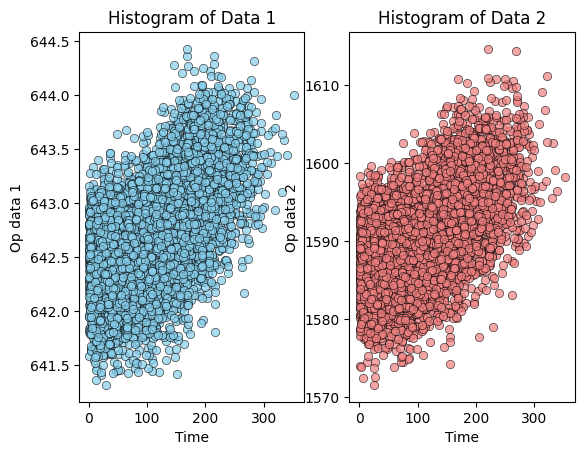

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=2) # Creates a figure with 1 row and 2 columns of subplots
# Plot histogram on the first subplot
axs[0].scatter(train[train['cluster'] == 0]['Time, in cycles'], train[train['cluster'] == 0][train.columns[5]], 
               color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
axs[0].set_title('Histogram of Data 1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Op data 1')

# Plot histogram on the second subplot
axs[1].scatter(train[train['cluster'] == 0]['Time, in cycles'], train[train['cluster'] == 0][train.columns[6]], 
               color='lightcoral', alpha=0.7, edgecolors='black', linewidths=0.5)
axs[1].set_title('Histogram of Data 2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Op data 2')

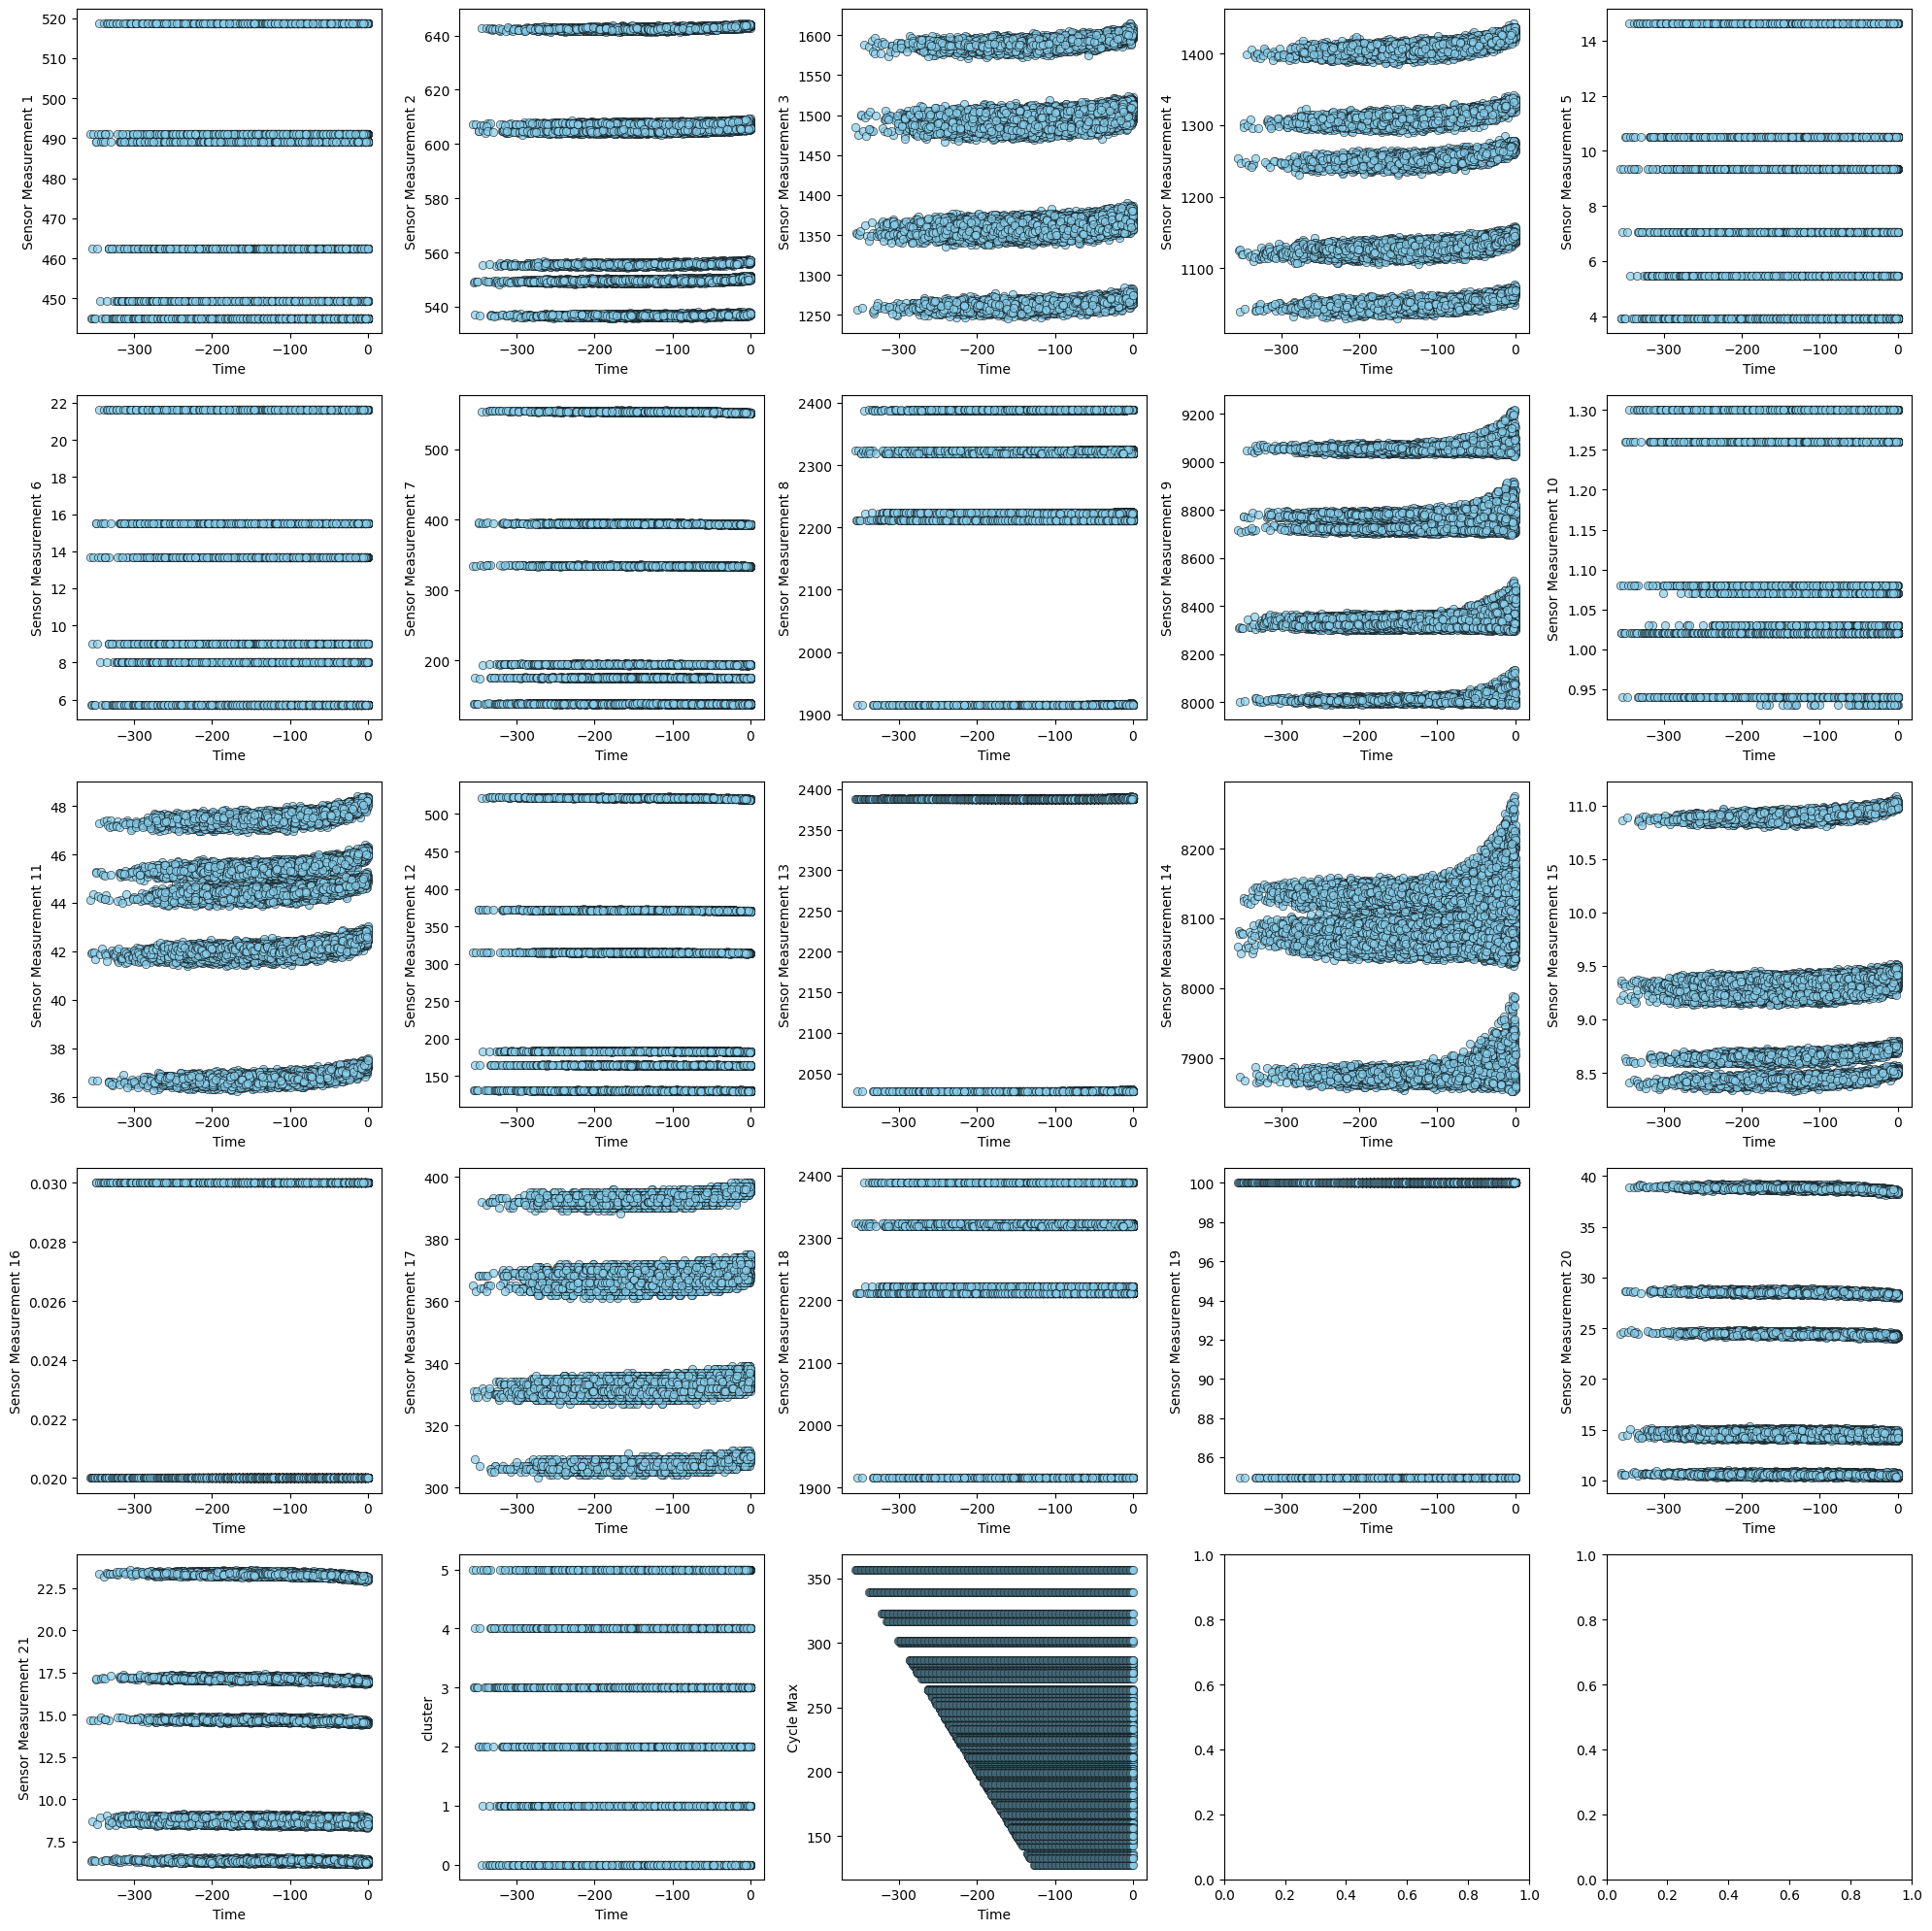

In [150]:
# Plot Remaining Life vs Sensor Measurement of all units and all clusters

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train['Remaining Life'], train[train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

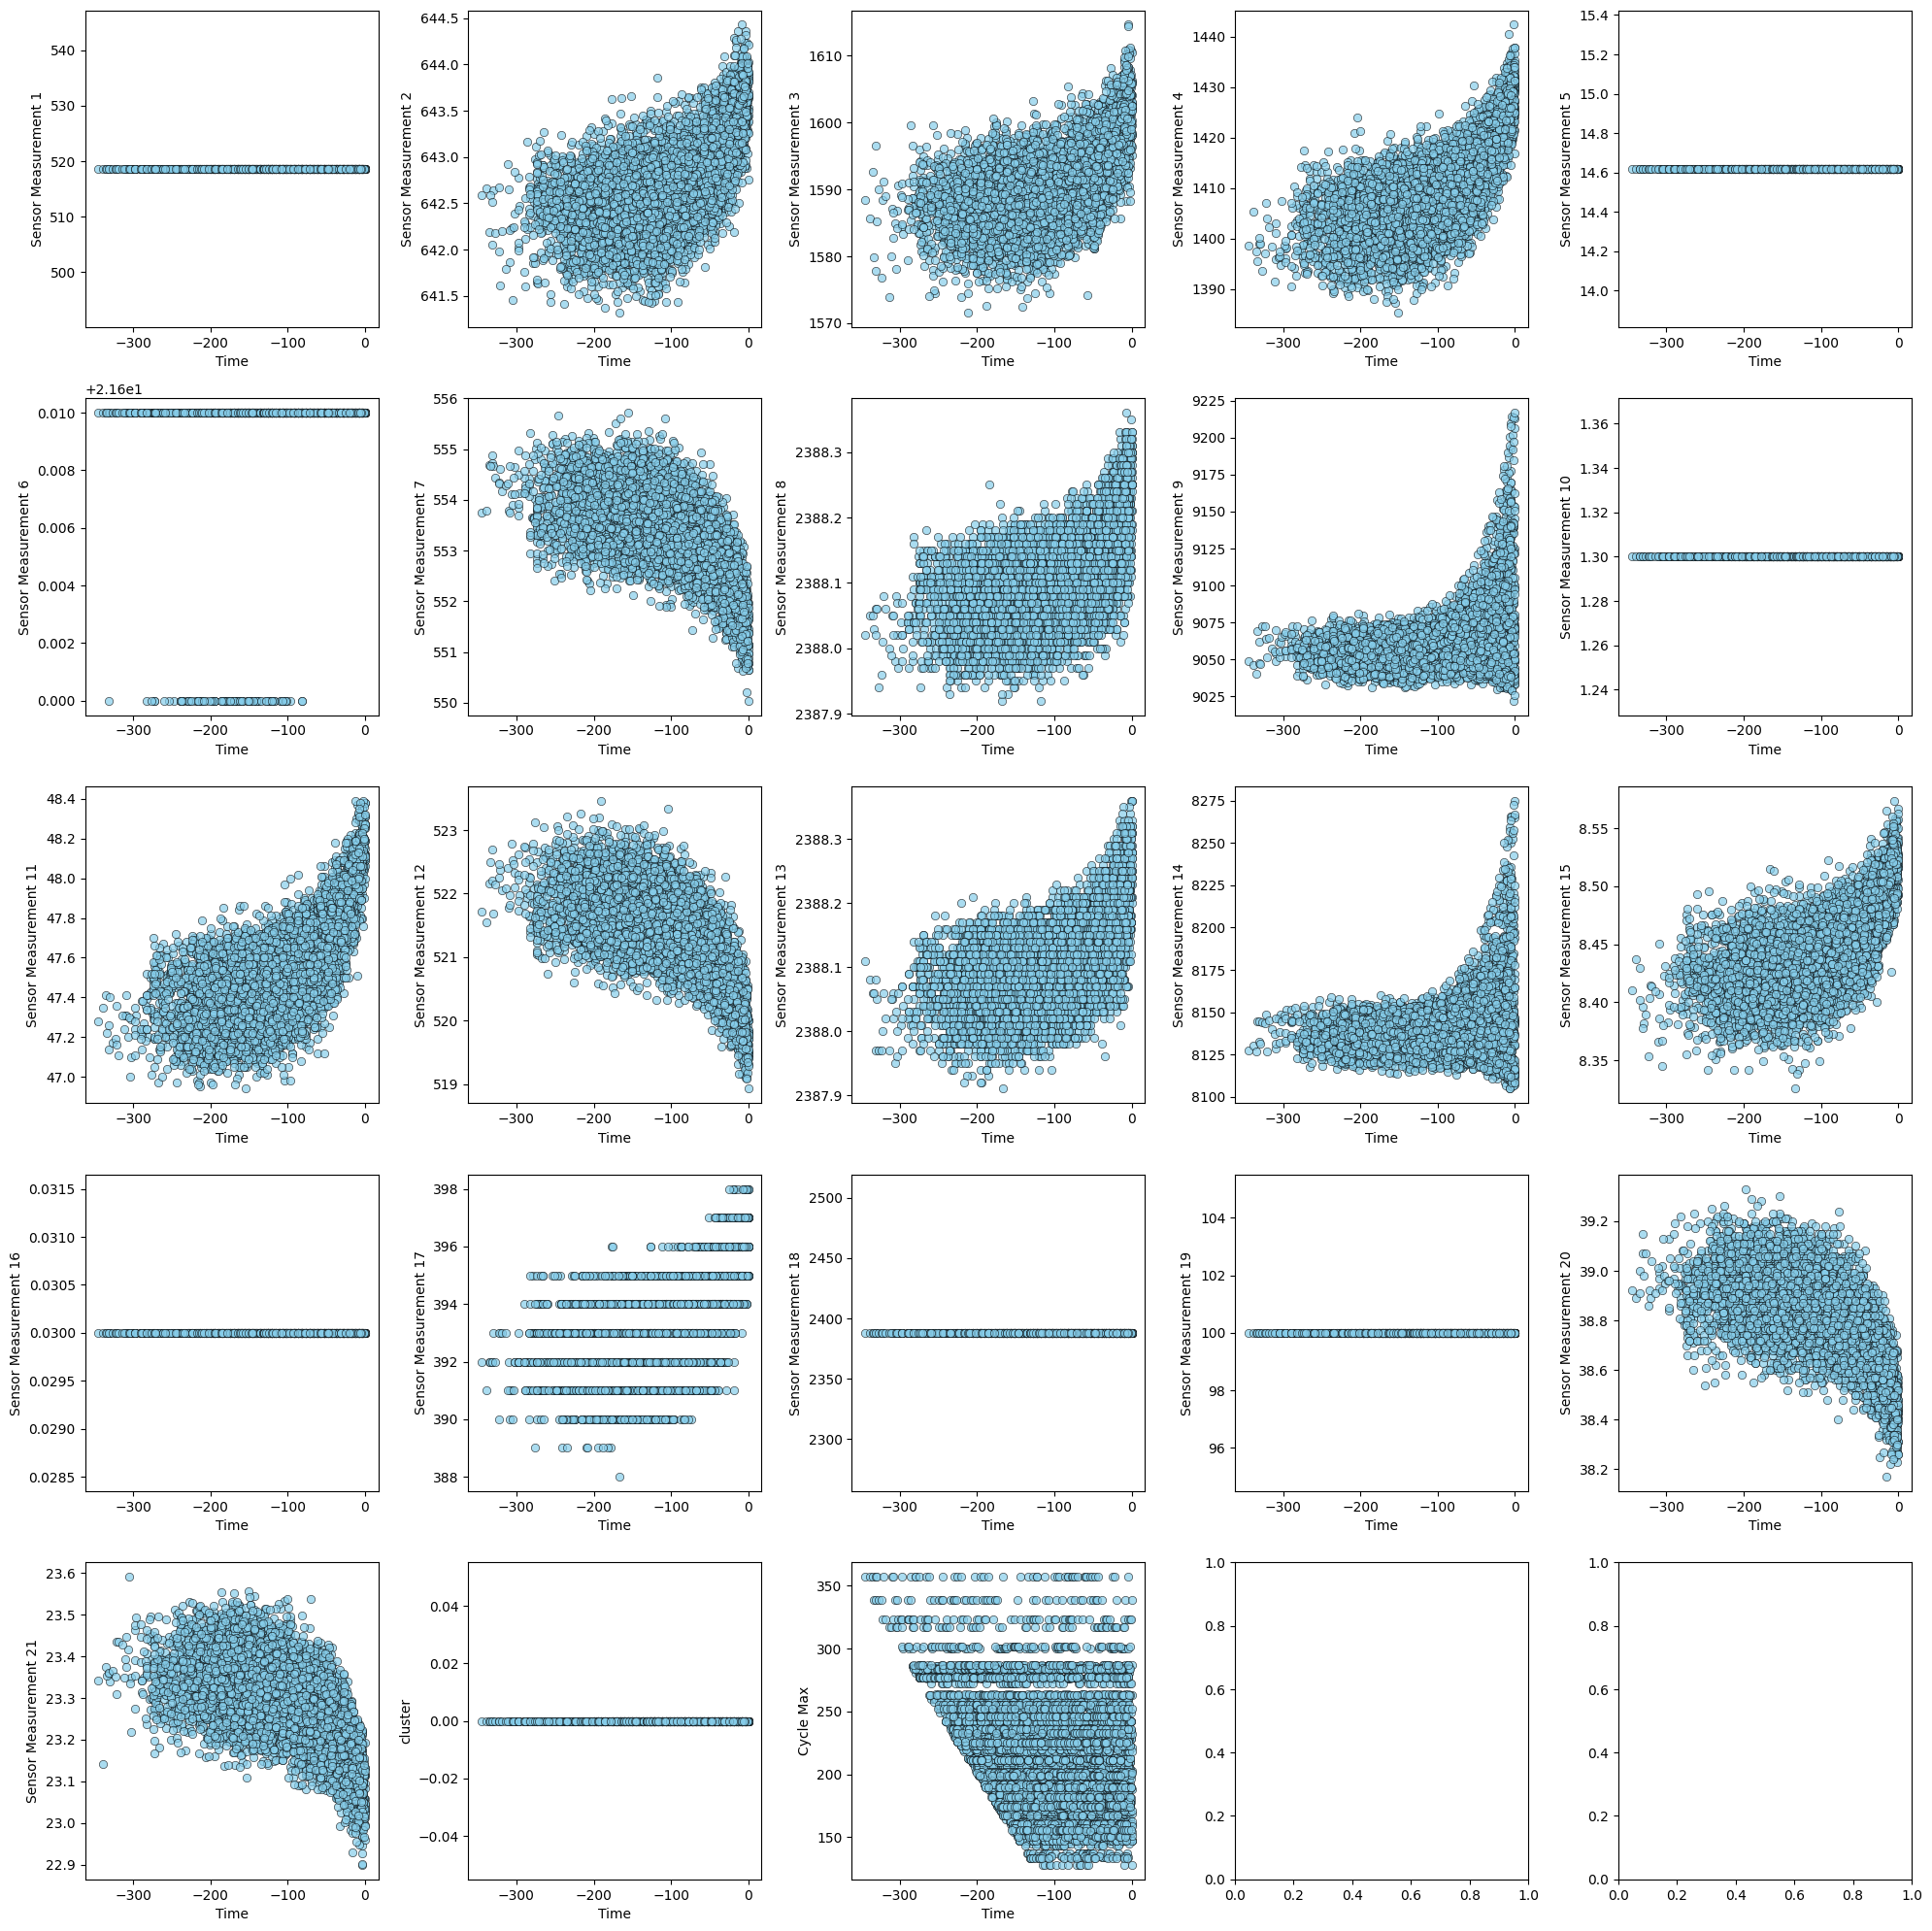

In [154]:
# Plot Remaining Life vs Sensor Measurement of all units and cluster 0

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train[train['cluster'] == 0]['Remaining Life'], train[train['cluster'] == 0][train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

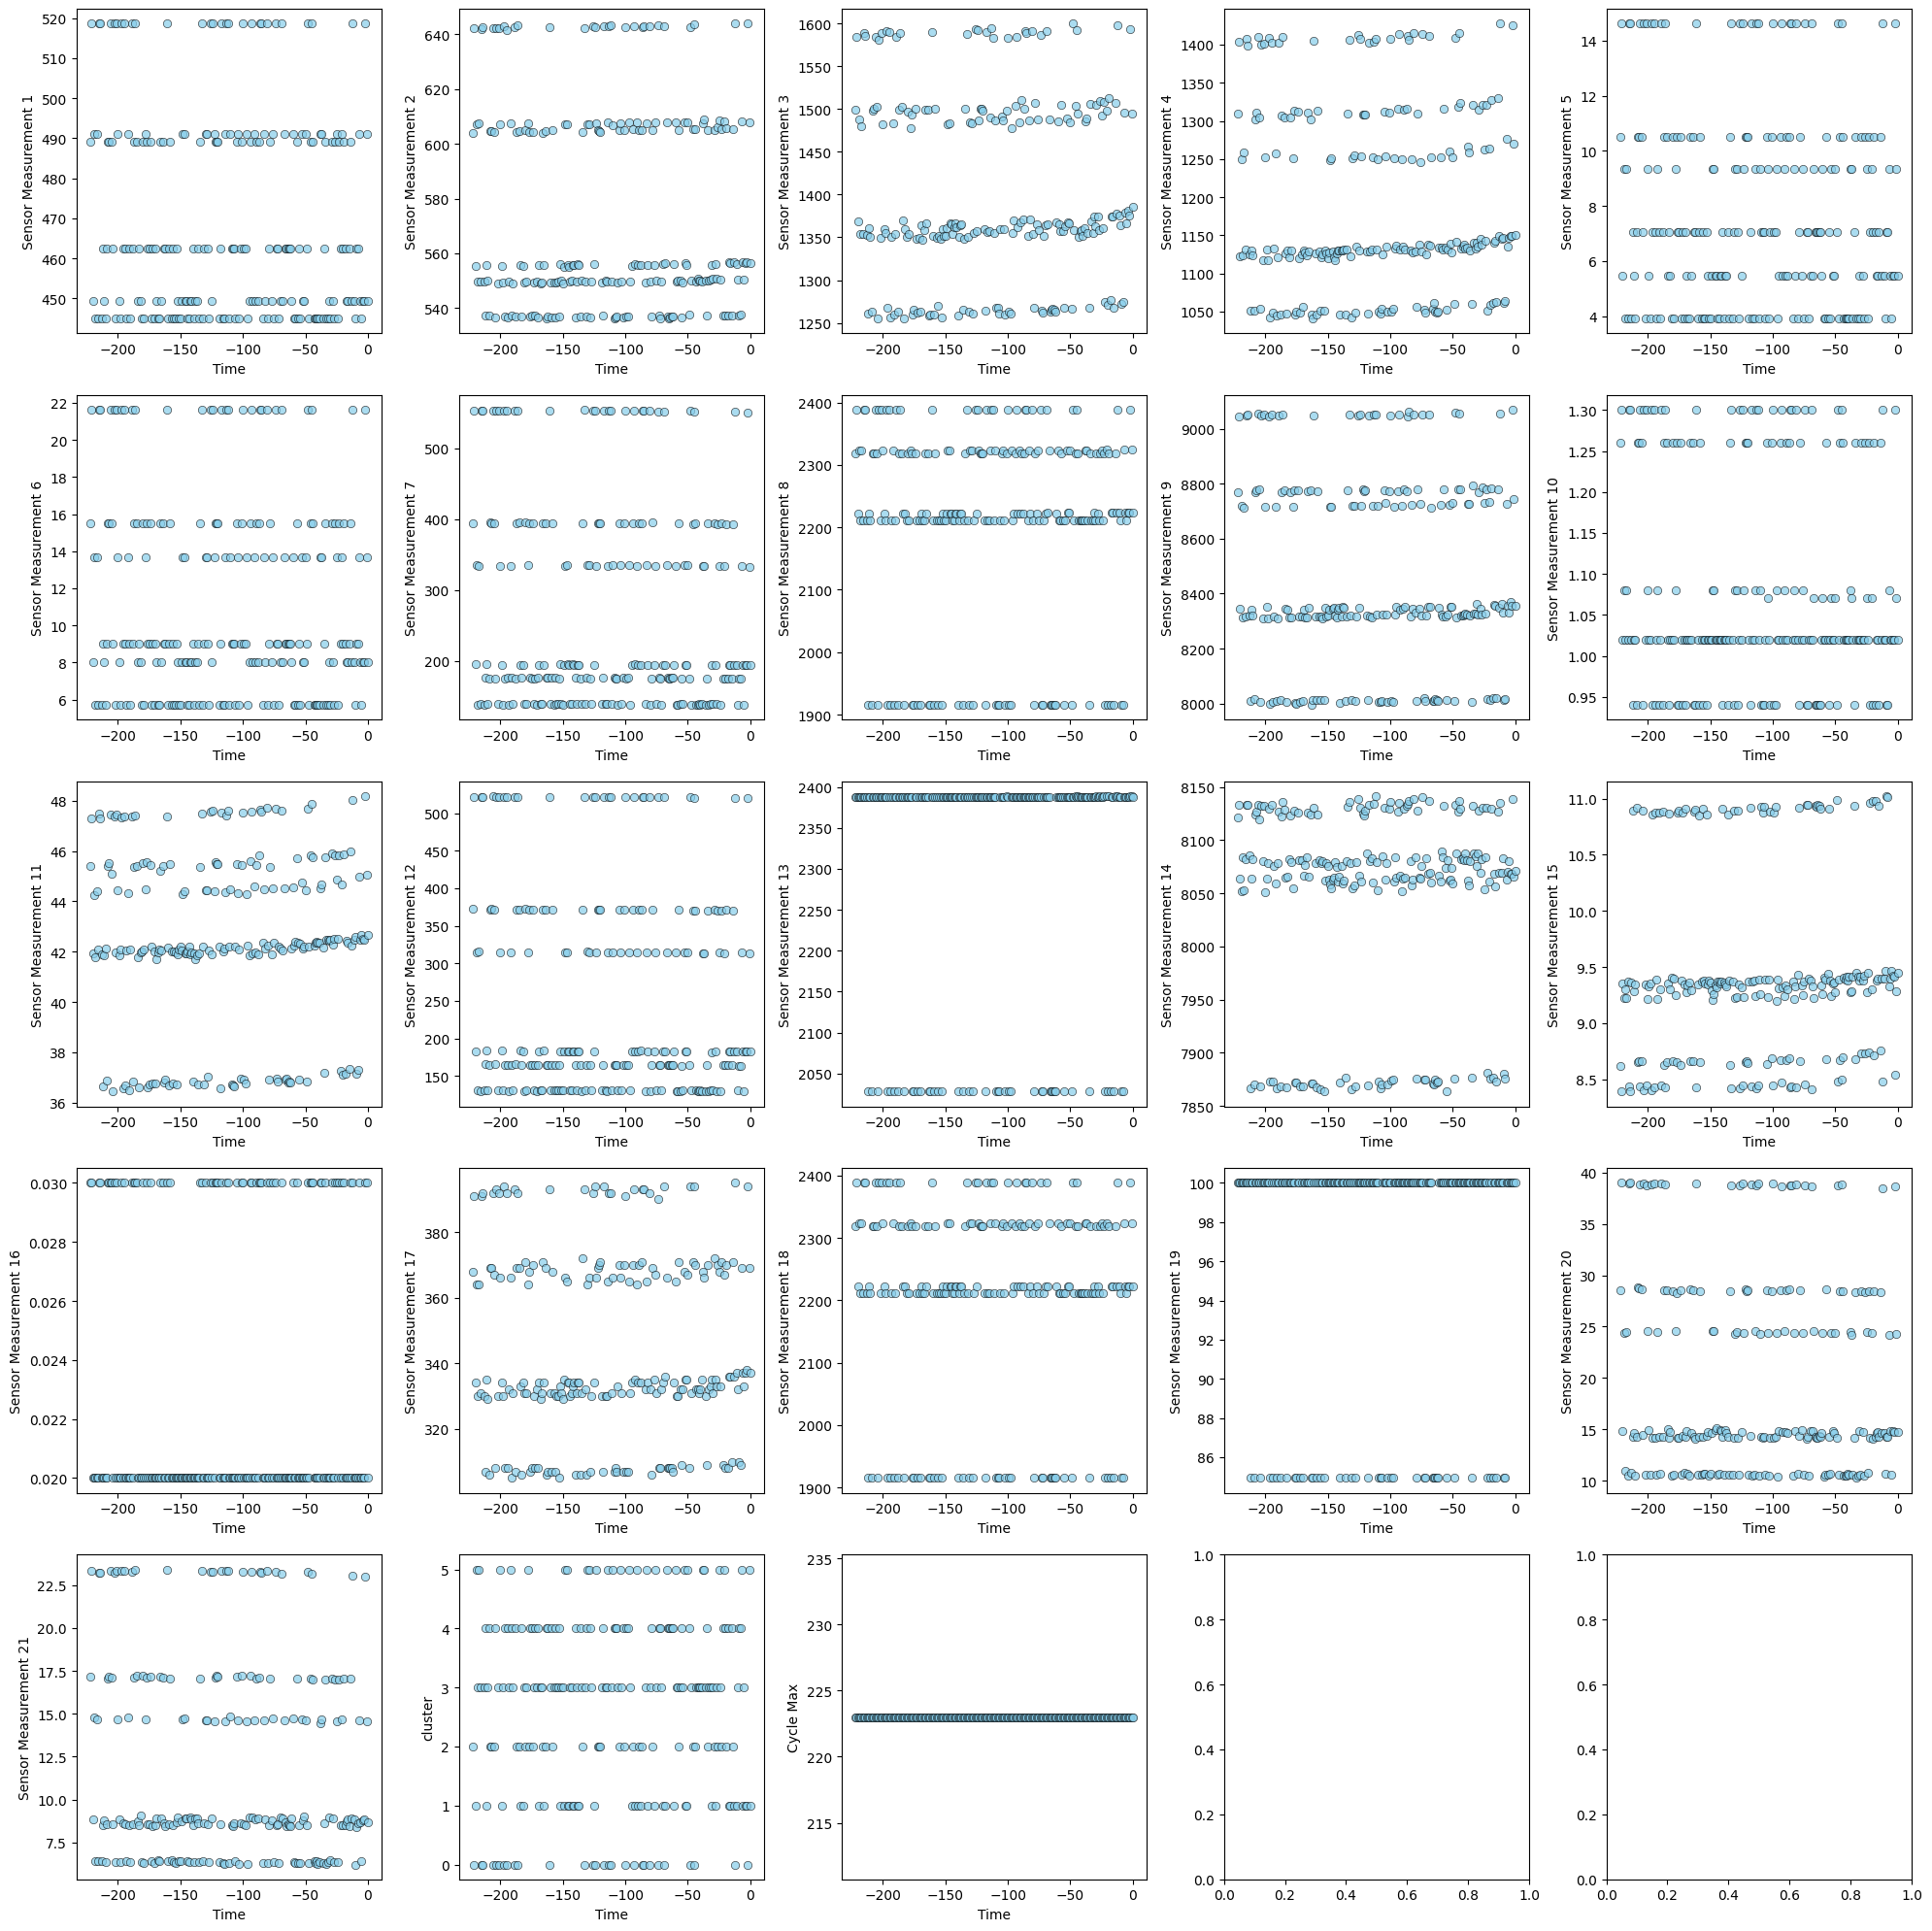

In [156]:
# Plot Remaining Life vs Sensor Measurement of Unit 1 and all clusters

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train.loc[1]['Remaining Life'], train.loc[1][train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()